# Load datasets

In [1]:
import pandas as pd

df = pd.read_csv('Datasets/fake_job_postings.csv')
df = df[['description', 'fraudulent']]

df.head(10)

,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0
5,Job OverviewApex is an environmental consultin...,0
6,Your Responsibilities: Manage the English-spea...,0
7,Who is Airenvy?Hey there! We are seasoned entr...,0
8,Implementation/Configuration/Testing/Training ...,0
9,The Customer Service Associate will be based i...,0


In [2]:
print("Length of Fraud: ", len(df[df['fraudulent'] == 1]))
print("Length of Not Fraud: ", len(df[df['fraudulent'] == 0]))
print("Total: ", len(df['fraudulent']))

Length of Fraud:  866
Length of Not Fraud:  17014
Total:  17880


## Check missing value.

In [3]:
print("Description: ", len(df[df['description'].isnull()]))
print("Fraudulent: ", len(df[df['fraudulent'].isnull()]))

Description:  1
Fraudulent:  0


### We found 1 missing value in Description field. Better get rid of it since, we have 178800 rows, cause large data.

In [4]:
df = df[df['description'].notnull()]

print("Total: ", len(df))

Total:  17879


## Let's visualization (pie chart)

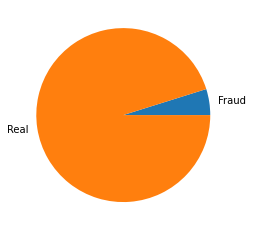

In [5]:
import matplotlib.pyplot as plt

plt.pie([len(df[df['fraudulent'] == 1]), len(df[df['fraudulent'] == 0])], labels=["Fraud", "Real"])
plt.show()

# Let's cleaning data with the help of NLTK library.

### Import library of NLTK

In [6]:
import string
import re

import nltk # import nltk class
from nltk.stem.porter import PorterStemmer # used for Stemming
from nltk.stem import WordNetLemmatizer # used for Lemmatization

### Creating Remove Punctation function

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def remPunc(txt):
    txt2 = "".join([c for c in txt if c not in string.punctuation])
    
    return txt2

In [9]:
df['description'] = df['description'].apply(lambda x: remPunc(x))
df.head()

,description,fraudulent
0,Food52 a fastgrowing James Beard Awardwinning ...,0
1,Organised Focused Vibrant AwesomeDo you hav...,0
2,Our client located in Houston is actively seek...,0
3,THE COMPANY ESRI – Environmental Systems Resea...,0
4,JOB TITLE Itemization Review ManagerLOCATION F...,0


### Creating tokenization function

In [10]:
def tok(txt):
    txt2 = re.split('\W+', txt)
    
    return txt2

In [11]:
df['description'] = df['description'].apply(lambda x: tok(x.lower()))
df.head()

,description,fraudulent
0,"[food52, a, fastgrowing, james, beard, awardwi...",0
1,"[organised, focused, vibrant, awesomedo, you, ...",0
2,"[our, client, located, in, houston, is, active...",0
3,"[the, company, esri, environmental, systems, r...",0
4,"[job, title, itemization, review, managerlocat...",0


### Creating Remove Stopwords function

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10] # Let's you know some example, which show output given below

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
def remSW(txt):
    txt2 = [word for word in txt if word not in stopwords]
    
    return txt2

In [14]:
df['description'] = df['description'].apply(lambda x: remSW(x))
df.head()

,description,fraudulent
0,"[food52, fastgrowing, james, beard, awardwinni...",0
1,"[organised, focused, vibrant, awesomedo, passi...",0
2,"[client, located, houston, actively, seeking, ...",0
3,"[company, esri, environmental, systems, resear...",0
4,"[job, title, itemization, review, managerlocat...",0


### Creating Stemming and Lemmatization function individual

-> Stemming means same meaningful, but difference. For example, run == running == runs; play == playing, and so on;

-> Lemmatization is similar to stemming, but difference verb phase. For example, be == is == was, have == had == has, and so on.

In [15]:
# Stemming
pS = PorterStemmer()

def stemming(txt):
    txt2 = [pS.stem(c) for c in txt]
    
    return txt2

# Lemmatization
wL = WordNetLemmatizer()

def lemma(txt):
    txt2 = [wL.lemmatize(w) for w in txt]
    
    return txt2

In [16]:
df['description'] = df['description'].apply(lambda x: stemming(x))

df.head()

,description,fraudulent
0,"[food52, fastgrow, jame, beard, awardwin, onli...",0
1,"[organis, focus, vibrant, awesomedo, passion, ...",0
2,"[client, locat, houston, activ, seek, experien...",0
3,"[compani, esri, environment, system, research,...",0
4,"[job, titl, item, review, managerloc, fort, wo...",0


In [17]:
df['description'] = df['description'].apply(lambda x: lemma(x))

df.head()

,description,fraudulent
0,"[food52, fastgrow, jame, beard, awardwin, onli...",0
1,"[organis, focus, vibrant, awesomedo, passion, ...",0
2,"[client, locat, houston, activ, seek, experien...",0
3,"[compani, esri, environment, system, research,...",0
4,"[job, titl, item, review, managerloc, fort, wo...",0


# Let's display wordcloud

## Create function

In [18]:
import wordcloud

def showWordCloud(df):
    txt = ' '.join(df['description'].astype(str).tolist())
    
    figWC = wordcloud.WordCloud(background_color='black', colormap='Reds', width=1400, height=800).generate(txt)
    
    plt.imshow(figWC)

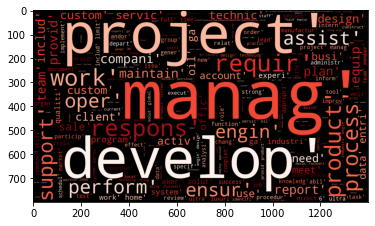

In [19]:
showWordCloud(df[df['fraudulent'] == 1])

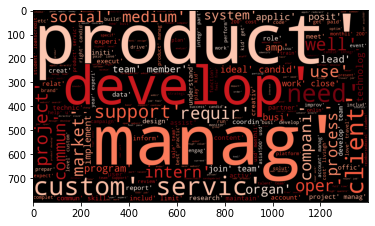

In [20]:
showWordCloud(df[df['fraudulent'] == 0])

# Preparing data for training

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

In [22]:
X = df['description'].values
y = df['fraudulent'].values

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
t = Tokenizer()
t.fit_on_texts(xTrain)

In [24]:
encodedTrain = t.texts_to_sequences(xTrain)
encodedTest = t.texts_to_sequences(xTest)
print(encodedTrain[0:2])

[[10518, 1426, 219, 111, 361, 1820, 185, 149, 19, 1885, 1010, 26, 813, 219, 633, 2013, 2115, 996, 126, 1886, 26, 57, 536, 835, 626, 2074, 2116, 1290, 78, 461, 101, 508, 1398, 463, 3649, 99, 3015, 160, 16, 1641, 49, 1678, 616, 15, 359, 128, 2055, 3727, 90, 685, 59, 100, 310, 477, 5, 536, 202, 4329, 685, 4330, 1810, 15, 3434, 137, 9, 361, 2450, 3593, 108, 68, 681, 149, 1081, 190, 758, 12084, 824, 37, 2, 15, 12, 19028, 2799, 1, 58, 1296, 14561, 463, 579, 14562, 579, 113, 14563, 5, 1784, 1679, 4627, 91, 5, 20, 2, 312, 5, 683], [1, 12085, 57, 27, 25, 122, 133, 68, 687, 2, 348, 54, 49, 9, 12085, 57, 2386, 12085, 57, 1436, 679, 104, 492, 7, 9, 12085, 57, 448, 311, 410, 385, 351, 15, 128, 185, 14, 64, 28, 49, 8, 385, 351]]


In [25]:
maxLength = 10
paddedTrain = pad_sequences(encodedTrain, maxlen=maxLength, padding="post")
paddedTest = pad_sequences(encodedTest, maxlen=maxLength, padding="post")
print(paddedTrain)

[[ 1784  1679  4627 ...   312     5   683]
 [   15   128   185 ...     8   385   351]
 [ 2226   550    26 ...    18   652   145]
 ...
 [   58     6   288 ...   124   553    17]
 [22986     6 75875 ...   650    42   127]
 [  183   499   927 ...  1900  1013  4875]]


## Building deep learning model

In [26]:
vocabSize = len(t.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocabSize, 24, input_length = maxLength))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

2022-04-17 07:45:00.468163: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-17 07:45:00.471651: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cskushal18): /proc/driver/nvidia/version does not exist
2022-04-17 07:45:00.473878: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 24)            1821024   
                                                                 
 flatten (Flatten)           (None, 240)               0         
                                                                 
 dense (Dense)               (None, 500)               120500    
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [27]:
earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(
    x=paddedTrain, y=yTrain,
    epochs=50, validation_data=(paddedTest, yTest), verbose=1,
    callbacks=[earlyStop]
)

Epoch 1/50
447/447 [==============================] - 7s 13ms/step - loss: 0.1636 - accuracy: 0.9570 - val_loss: 0.1463 - val_accuracy: 0.9631
Epoch 2/50
447/447 [==============================] - 5s 12ms/step - loss: 0.0850 - accuracy: 0.9748 - val_loss: 0.1463 - val_accuracy: 0.9673
Epoch 3/50
447/447 [==============================] - 6s 12ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.1952 - val_accuracy: 0.9603
Epoch 4/50
447/447 [==============================] - 5s 12ms/step - loss: 0.0166 - accuracy: 0.9957 - val_loss: 0.4133 - val_accuracy: 0.9480
Epoch 5/50
447/447 [==============================] - 6s 12ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.4879 - val_accuracy: 0.9416
Epoch 6/50
447/447 [==============================] - 6s 13ms/step - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0.5881 - val_accuracy: 0.9360
Epoch 7/50
447/447 [==============================] - 5s 12ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.7445 - val_accuracy: 0.9346

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def cReport(yTrue, yPred):
    print("----------> Classification Report <------------")
    print(classification_report(yTrue, yPred))
    accSc = accuracy_score(yTrue, yPred)
    print("Accuracy: " + str(accSc))
    
    return accSc

def plotConfusionMatrix(yTrue, yPred):
    mtx = confusion_matrix(yTrue, yPred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidth=.5, cmap="Blues", cbar=False)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
preds = (model.predict(paddedTest) > 0.5).astype("int32").tolist()

In [30]:
cReport(yTest, preds)

----------> Classification Report <------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3394
           1       0.34      0.58      0.43       182

    accuracy                           0.92      3576
   macro avg       0.66      0.76      0.69      3576
weighted avg       0.94      0.92      0.93      3576

Accuracy: 0.921420581655481


0.921420581655481

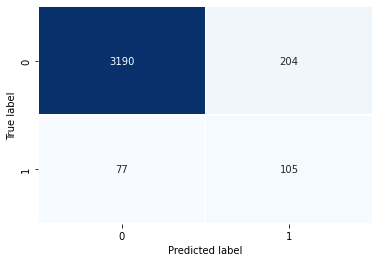

In [31]:
plotConfusionMatrix(yTest, preds)

In [32]:
model.save("fraudModel")

2022-04-17 07:46:24.541809: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: fraudModel/assets


In [33]:
import pickle

with open('fraudModel/tokenizer.pkl', 'wb') as output:
    pickle.dump(t, output, pickle.HIGHEST_PROTOCOL)

## Making predictions

In [34]:
import tensorflow

sModel = tensorflow.keras.models.load_model("fraudModel")
with open("fraudModel/tokenizer.pkl", "rb") as input:
    token = pickle.load(input)

In [35]:
msg = ["IC&E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:Â Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies safety hazards and recommends solutions.Follows environmental compliance work practices.Identifies environmental non-compliance problems and assist in implementing solutions.Assists other team members and works with all departments to support generating station in achieving their performance goals.Trains other team members in the areas of instrumentation, control, and electrical systems.Performs housekeeping assignments, as directed.Conduct equipment and system tagging according to company and plant rules and regulations.Perform equipment safety inspections, as required, and record results as appropriate.Â Participate in small construction projects.Â  Read and interpret drawings, sketches, prints, and specifications, as required.Orders parts as needed to affect maintenance and repair.Performs Operations tasks on an as-needed basis and other tasks as assigned.Available within a reasonable response time for emergency call-ins and overtime, plus provide acceptable off-hour contact by phone and company pager.Â Â Â Â Â Â Â Â Â  Excellent Verbal and Written Communications Skills:Ability to coordinate work activities with other team members on technical subjects across job families.Ability to work weekends, holidays, and rotating shifts, as required."]
msgProc = token.texts_to_sequences(msg)
msgProc = pad_sequences(msgProc, maxlen=maxLength, padding="post")
pred = (model.predict(msgProc) > 0.5).astype("int32").item()

print(pred)

0


# Entities and Phrases

In [36]:
df2 = pd.read_csv('Datasets/fake_job_postings.csv')
df2 = df2[['description', 'fraudulent']]
df2

,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0
...,...,...
17875,Just in case this is the first time you’ve vis...,0
17876,The Payroll Accountant will focus primarily on...,0
17877,Experienced Project Cost Control Staff Enginee...,0
17878,Nemsia Studios is looking for an experienced v...,0


In [44]:
txt = df2['description'][1]
txt

"Organised - Focused - Vibrant - Awesome!Do you have a passion for customer service? Slick typing skills? Maybe Account Management? ...And think administration is cooler than a polar bear on a jetski? Then we need to hear you!\xa0We are the Cloud Video Production Service and opperating on a glodal level. Yeah, it's pretty cool. Serious about\xa0delivering a world class product and excellent customer service.Our rapidly expanding business is looking for a talented Project Manager to manage the successful delivery of video projects, manage client communications and drive the production process. Work with some of the coolest brands on the planet and learn from a global team that are representing NZ is a huge way!We are entering the next growth stage of our business and growing quickly internationally. \xa0Therefore, the position is bursting with opportunity for the right person entering the business at the right time.\xa090 Seconds, the worlds Cloud Video Production Service -\xa0http://90

In [45]:
import spacy
sp = spacy.load('en_core_web_sm')

In [47]:
from spacy import displacy

displacy.render(sp(txt), style='ent', jupyter=True)